In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
#데이터 로드
df = pd.read_csv('all_review_.csv')
df

,Unnamed: 0,STAR,CONTENT
0,0,5,Seoul tower is very peacfull and one of clean ...
1,1,4,We have walked up and down It is a good walk ...
2,2,4,It was a bit late to open and it was raining ...
3,3,5,It was nice to be able to see the beautiful n...
4,4,5,Got there at dusk By the time we got into the ...
...,...,...,...
15460,15466,5,Dream of a very well planned place
15461,15467,5,Christmas organized the event very beautifully
15462,15468,4,Wow
15463,15469,5,Excelente experiencia


In [3]:
df=df.dropna()

In [4]:
df.isnull().sum()

Unnamed: 0    0
STAR          0
CONTENT       0
dtype: int64

In [5]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
#워드카운트를 위해 String 형태로 전환
review_str= ' '.join(list(df['CONTENT'])).lower()
review_str[:500]

'seoul tower is very peacfull and one of clean place that i visit in my life beautiful city view fantastic gardens trees and i do highly suggest you to visit here if you visit seoul must add on your booking list when you come this place you will love to spend your time  we have walked up and down it is a good walk on one side stairs on the other path through the forest visibility a bit poor but to be expected cloudy weather   it was a bit late to open and it was raining and it was hard to wait ou'

In [6]:
#필요한 패키지 임포트 및 다운로드
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
#불용어 확인
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
#불용어 추가
stop_words = set(stopwords.words('english'))
add_stop_words = ["time","area","take","much","thing","love","look","one","cable","car","'", ",", "'s", ":", ".", "?", "!","(",")","n't","good","like","awesome","perfect","nice","also","well","seoul","beautiful","wonderful","views","city","place","visit","tower","just","lotte","world","went","street","lot","lots","places","bookstores","books","feel","animals","animals","coex","mall","great","pretty","best","go","see","really","many"]
for word in add_stop_words:
    stop_words.add(word)

In [9]:
#리뷰들을 토큰화 & 불용어제거
word_tokens = word_tokenize(review_str)
review_list = [] #리스트 형태 하나와 
review = '' #스트링 형태 하나를 만듦.
#for w in word_tokens: 
for w in word_tokens:
    if w not in stop_words: 
        review_list.append(w)
        review = review + ' ' + w

In [10]:
print("불용어 개수 : ", len(stop_words))
print("불용어 처리 전 : ", len(review_str))
print("불용어 처리 후 : ", len(review_list))
print("불용어 처리로 약 ", round(100-len(review_list)/len(review_str)*100, 1),"% 감소")

불용어 개수 :  234
불용어 처리 전 :  4039393
불용어 처리 후 :  319188
불용어 처리로 약  92.1 % 감소


In [11]:
#stemmer = nltk.stem.SnowballStemmer('english')
 #   stemmer_words = [stemmer.stem(word) for word in no_stops]

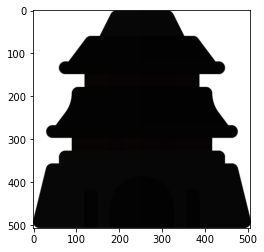

In [12]:
#마스크이미지 업로드 & 워드클라우드 만들기
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
mask = np.array(Image.open("ndm.png"))
plt.imshow(mask)

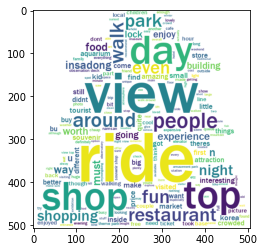

In [13]:
wc_review = WordCloud(background_color='white', font_path='framd.ttf',mask=mask).generate(review)
plt.imshow(wc_review)

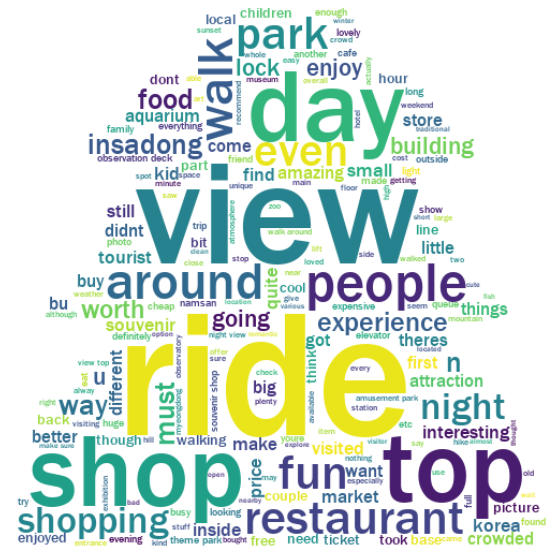

In [14]:
fig = plt.figure(figsize=(10, 10))#figsize=(10, 10))
plt.imshow(wc_review,interpolation="bilinear")#interpolation="bilinear"
plt.axis("off")
plt.show()

In [15]:
wc_review.to_file("wordcloud.png")

In [16]:
#단어빈도수 확인
review_30 = sorted(Counter(review_list).items(), reverse=True, key = lambda item:item[1])
review_30 = pd.DataFrame.from_dict(review_30)
review_30.columns = ['word', 'count']
review_30[:30].to_csv("word30.csv") #해당 데이터를 csv 파일로 저장.

In [17]:
review_30[:30]

,word,count
0,view,3868
1,get,2770
2,shops,2323
3,top,2296
4,walk,2233
5,day,2102
6,park,2098
7,around,2036
8,night,1929
9,food,1709
